# Task 1 using Wine Dataset

## Importing Libraries

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


## Loading the dataset

In [15]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X, y = wine_data.data, wine_data.target
feature_names = wine_data.feature_names
target_names = wine_data.target_names

## Exploring the data

### Dataset Head

In [21]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

### Dataset info

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### Dataset Describe

In [23]:
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

### Identifying Null Values

In [24]:
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


##  Univariate Analysis

### Distribution of Numerical Features

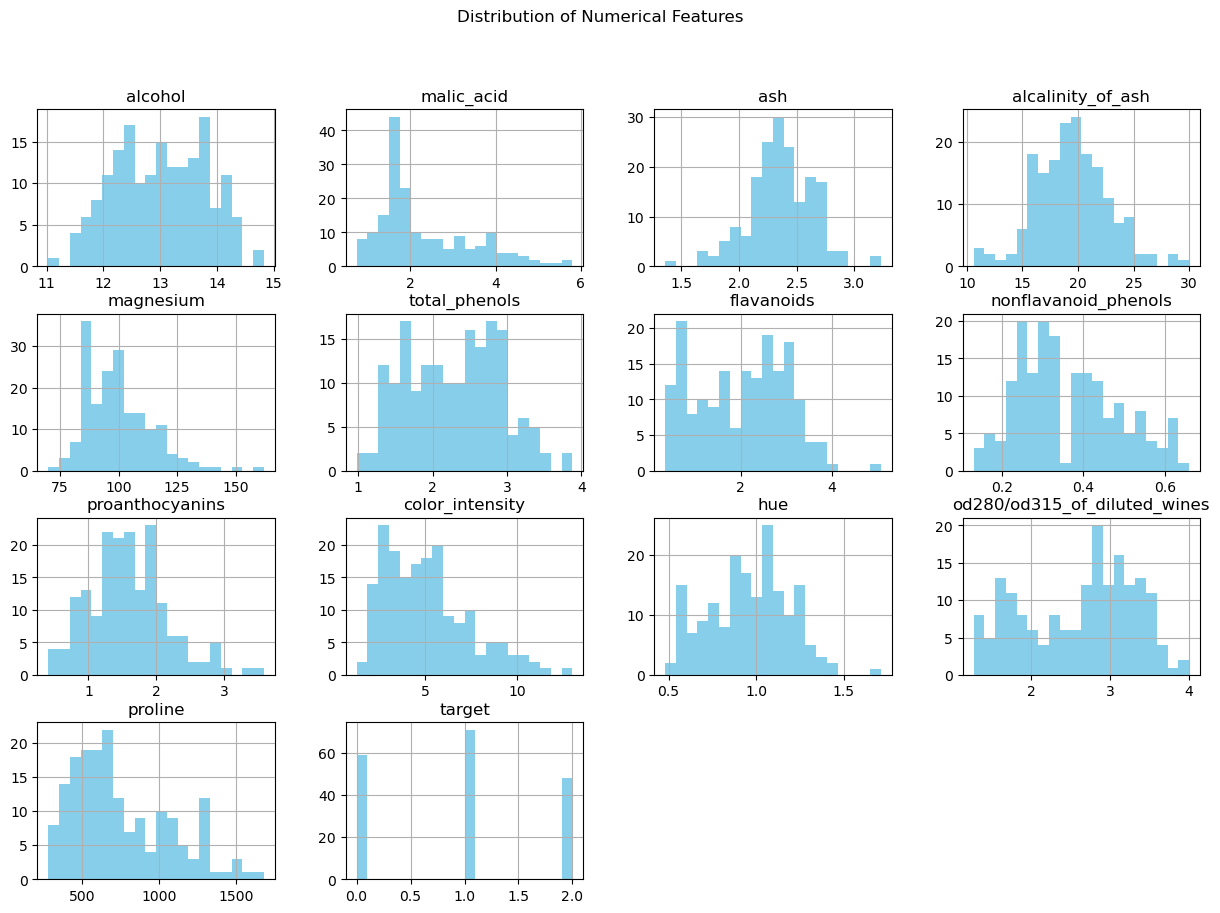

In [25]:
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

### Target Class Distribution

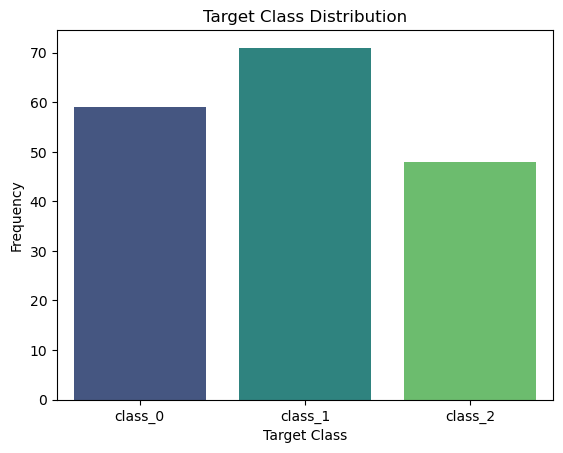

In [26]:
sns.countplot(x='target', data=df, palette='viridis')
plt.title("Target Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1, 2], labels=wine_data.target_names)
plt.show()

## Bivariate Analysis

### Shows relationships between pairs of features using Pair Plot

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


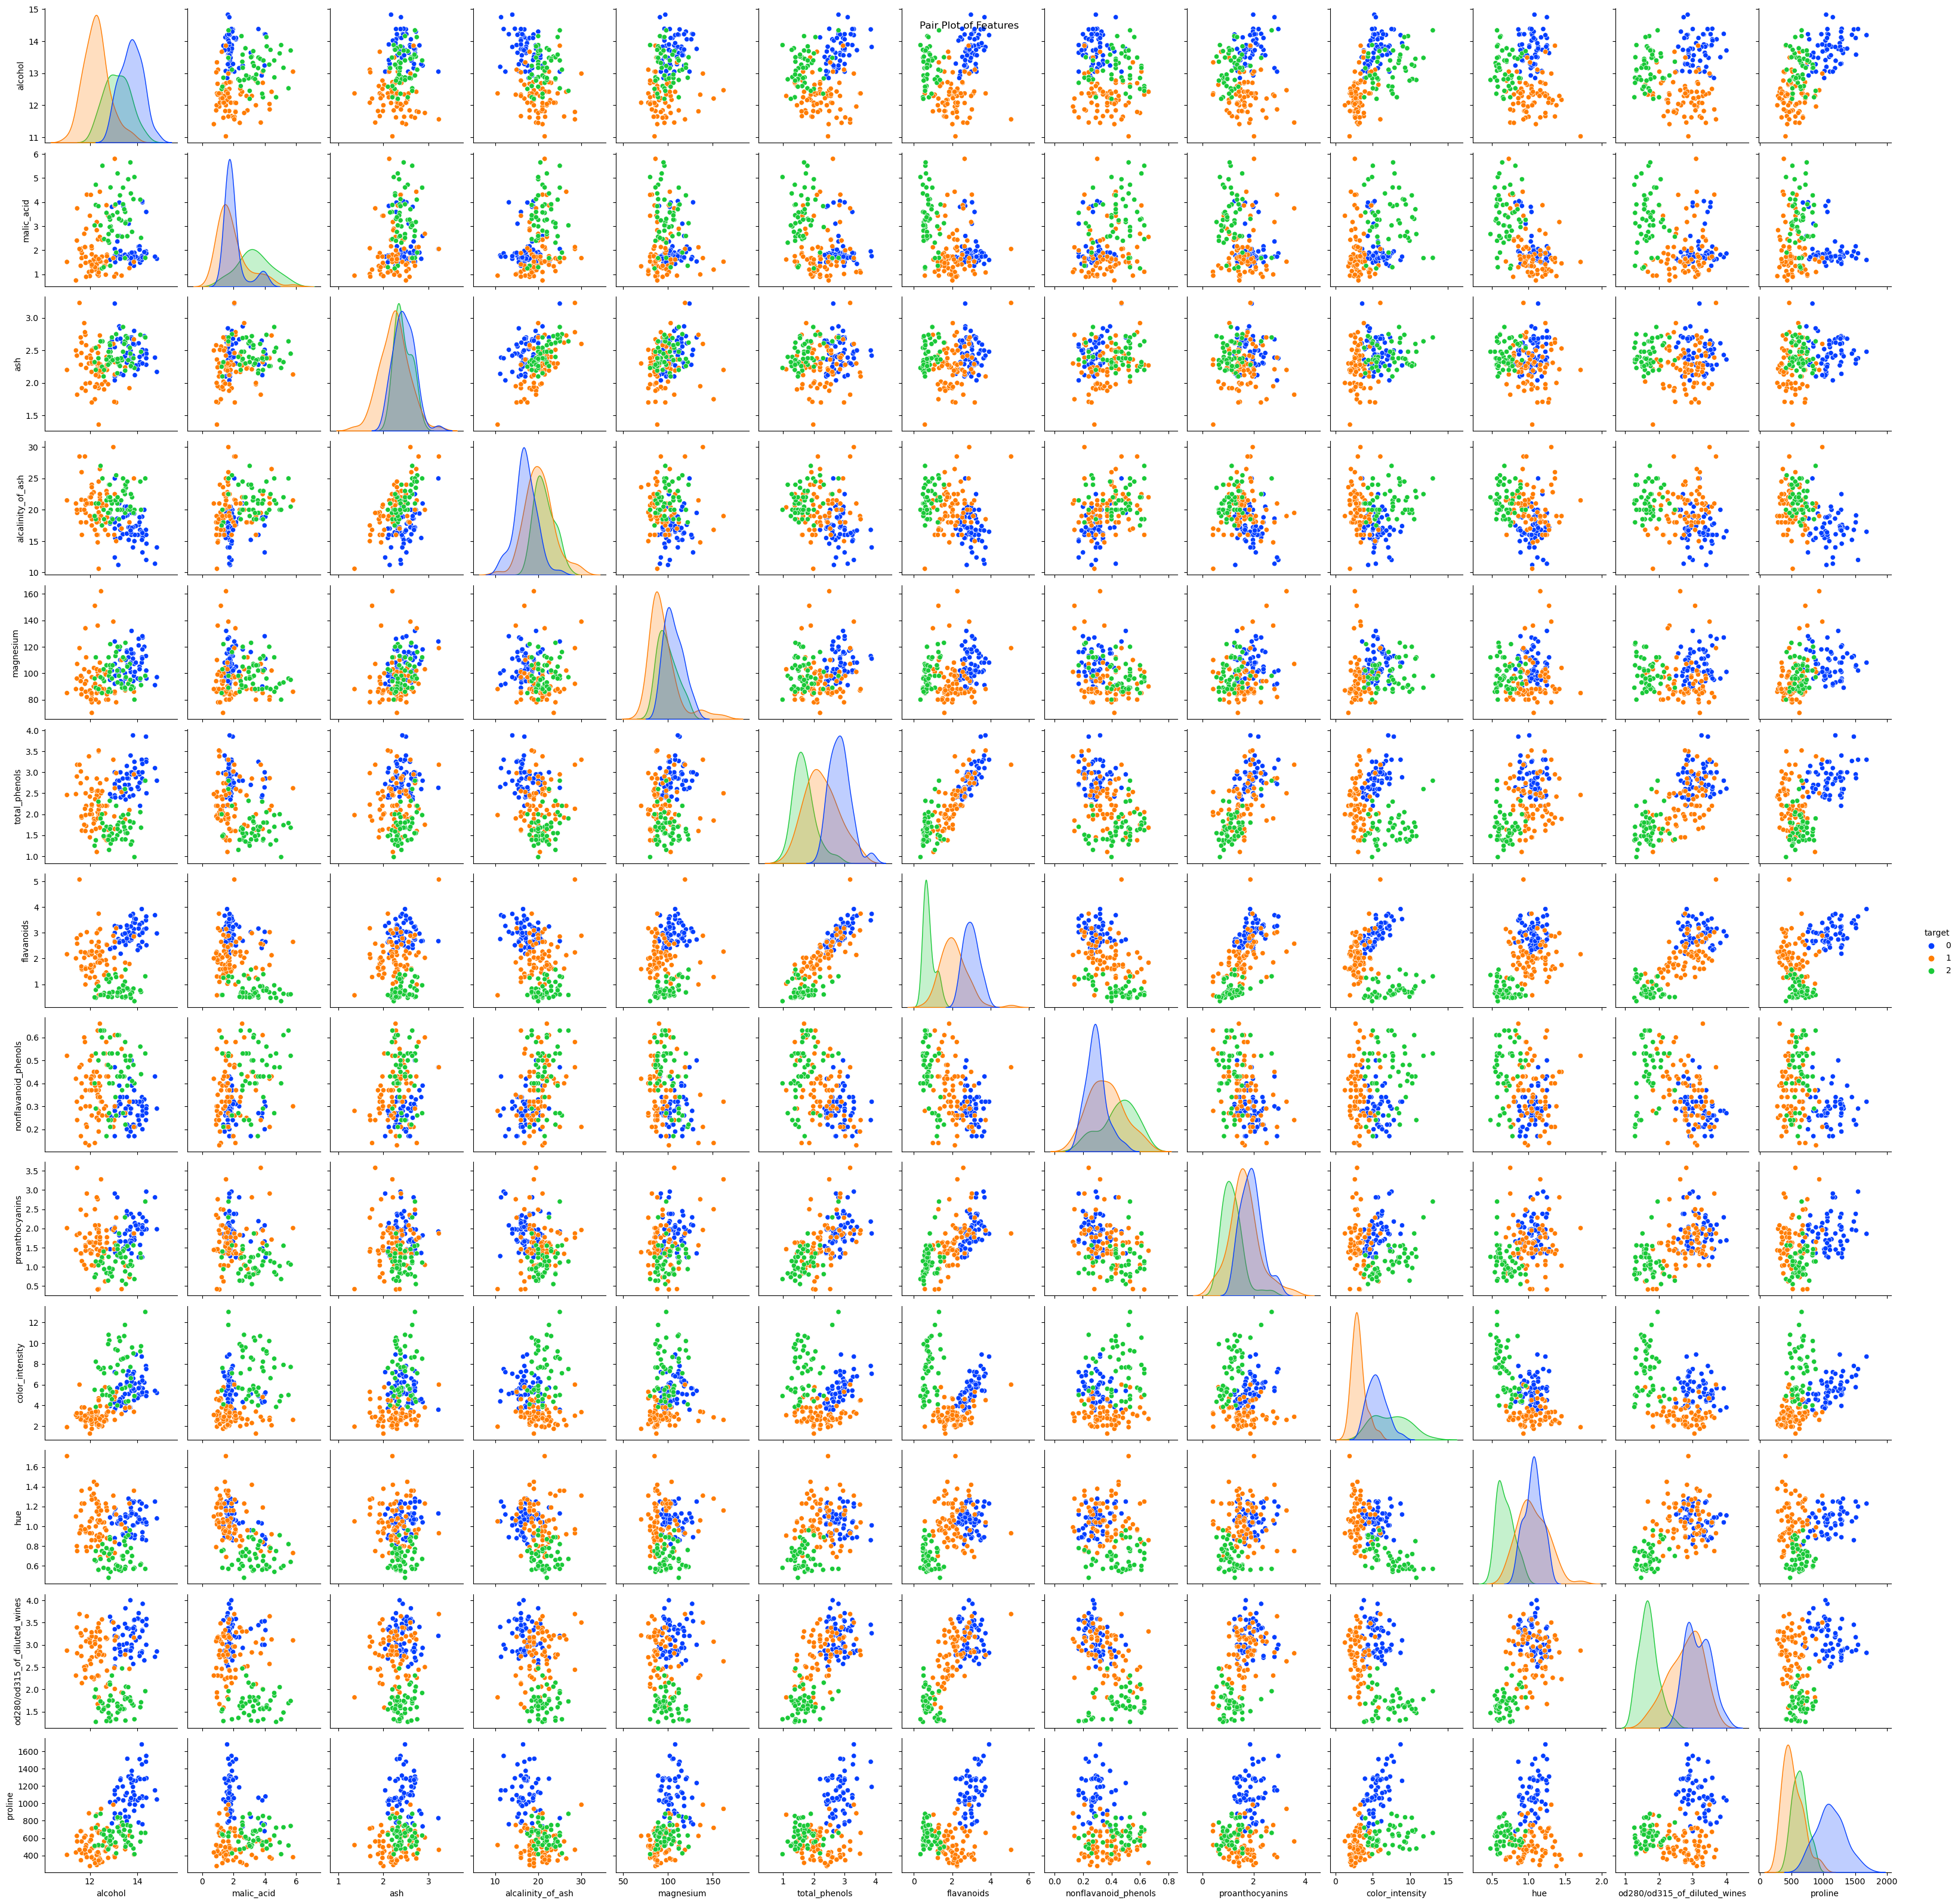

In [29]:
sns.pairplot(df, hue='target', palette='bright', diag_kind='kde')
plt.suptitle("Pair Plot of Features")
plt.show()

### Identifies relationships between features using HeatMap

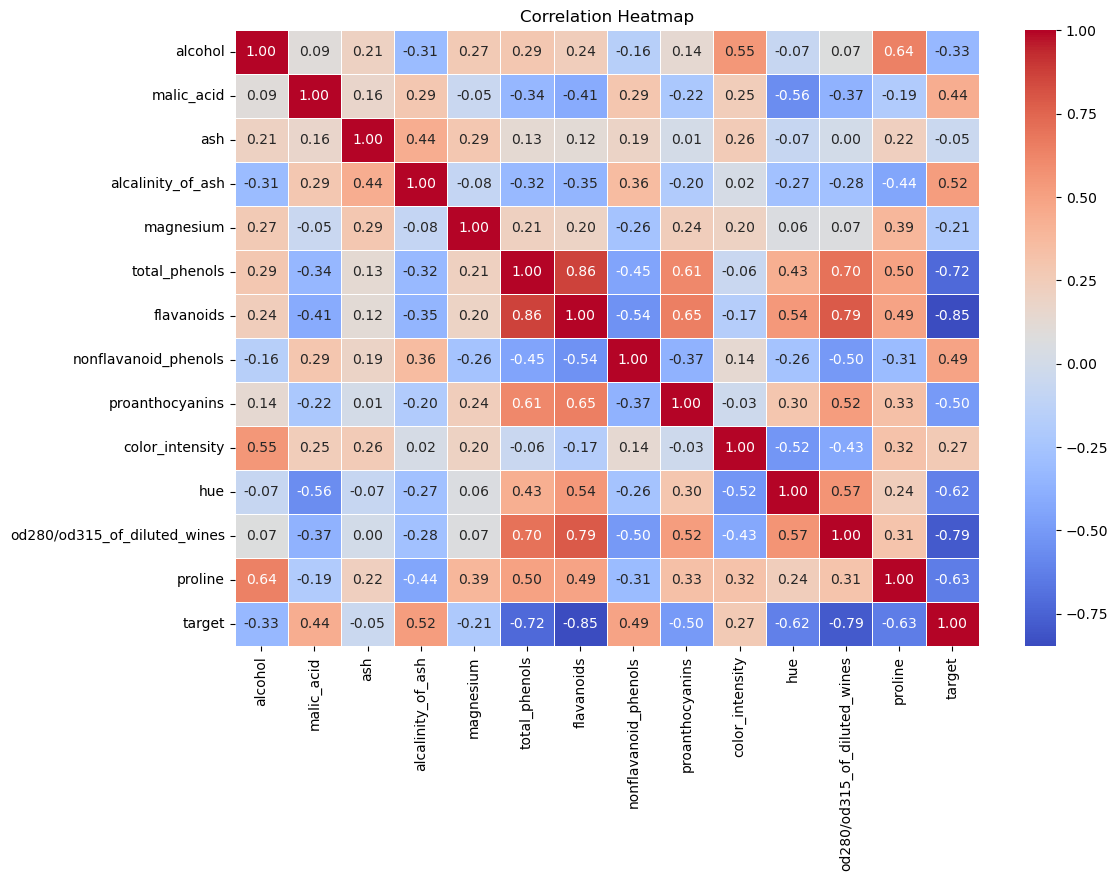

In [30]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Multivariate Analysis

### Check the distribution of each feature across target classes using Boxplots

In [ ]:
for col in wine_data.feature_names:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=col, data=df, palette='muted')
    plt.title(f"Boxplot of {col} by Target")
    plt.xlabel("Target Class")
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1, 2], labels=wine_data.target_names)
    plt.show()

### Show the distribution and density of features using Violin Plot

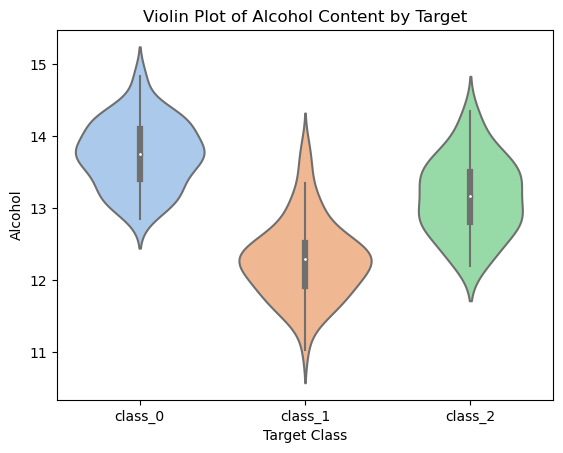

In [31]:
sns.violinplot(x='target', y='alcohol', data=df, palette='pastel')
plt.title("Violin Plot of Alcohol Content by Target")
plt.xlabel("Target Class")
plt.ylabel("Alcohol")
plt.xticks(ticks=[0, 1, 2], labels=wine_data.target_names)
plt.show()

## Processing the Dataset

### Split the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Preprocess the data 

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training a model with Random Forest Classifier

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [8]:
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy: 1.0


### Confusion Matrix

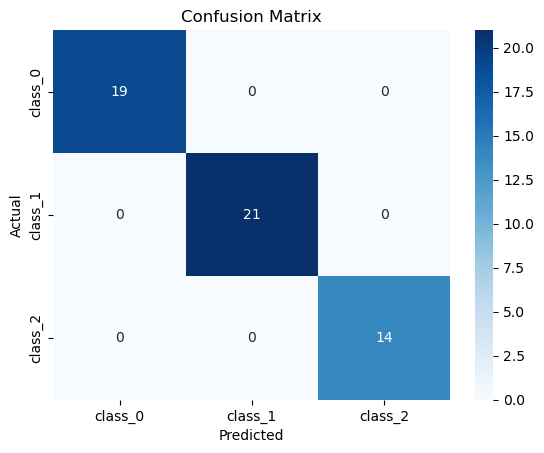

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature Importance

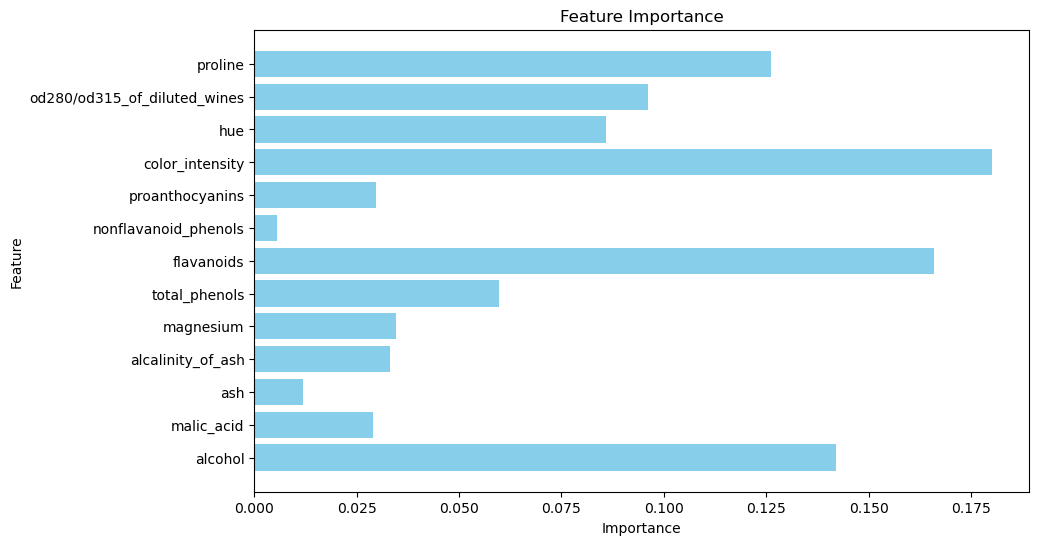

In [10]:
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Making Prediction using a new sample data

In [11]:
new_sample = [[13.5, 2.3, 2.4, 20.0, 100.0, 2.6, 2.8, 0.3, 1.6, 5.0, 1.1, 3.0, 1000.0]]
new_sample_scaled = scaler.transform(new_sample)
predicted_class = model.predict(new_sample_scaled)
print(f"Predicted class for new sample: {target_names[predicted_class[0]]}")

Predicted class for new sample: class_0
